In [213]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [214]:
#input_image_1, input_image_2 -> ../input/image_1/input_image_1
#                                ../input/image_1/input_image_2

In [215]:
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256

In [216]:
# list of pairs (input_image_1, input_image_2)
input_images = []

In [208]:
def go_through_input_directory(input_dir_path):
    list_subdirs_paths = [f.path for f in os.scandir(input_dir_path) if f.is_dir() and 'image' in f.name]

    for image_path in list_subdirs_paths:
        #print(image)
        images = os.listdir(image_path)
        paths = []
        #print(images)
        for image in images:
            paths.append(os.path.join(image_path, image))
        input_images.append(paths)
        
    return input_images
    

In [217]:
def resize_images(image, height, width): 
    image = tf.image.resize(input_image, [height, width])
    return image

In [218]:
# preprocessing
def preprocess(image_path_1, image_path_2):
    image_1 = cv2.imread(image_path_1)
    image_2 = cv2.imread(image_path_2)

    width, height, _ = image_1.shape
    
    # resize_image_1
    image_1 = cv2.resize(image_1, [width // 3, height])
    # resize_image_2
    image_2 = cv2.resize(image_2, [width // 3, height])
    
    # create blackout
    blackout = np.zeros((height, width // 3, 3), dtype = np.uint8)

    #concatenate
    result_image = np.concatenate((image_1, blackout, image_2), axis=1)
    plt.figure()
    plt.imshow(result_image)

    # resize to (256, 256, 3) -> generator
    result_image = cv2.resize(result_image, [IMAGE_WIDTH, IMAGE_HEIGHT])
    plt.figure()
    plt.imshow(result_image)

    return result_image

In [219]:
# input_images contains pairs of input images
print(go_through_input_directory('../input'))

[[], ['../input/image_1/8.jpg', '../input/image_1/226.jpg']]


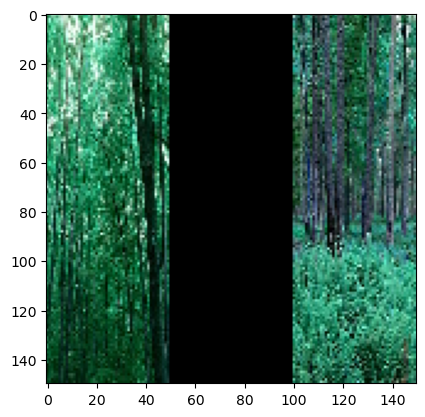

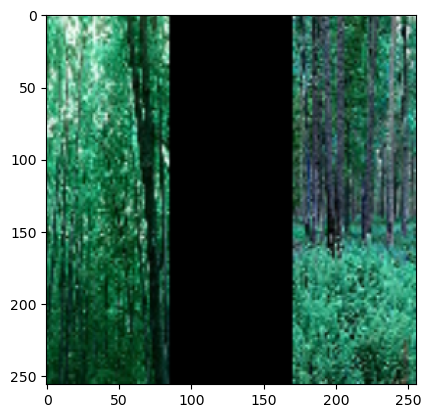

In [220]:
for image_pair in input_images:
    if(len(image_pair) == 2):
        #print(image_pair[0], image_pair[1])
        preprocess(image_pair[0], image_pair[1])